# Install and Import Dependencies

In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib tensorflowjs

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR-CONVERSION BGR-to-RGB
    image.flags.writeable = False                  # Convert image to not-writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Convert image to writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR-COVERSION RGB-to-BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

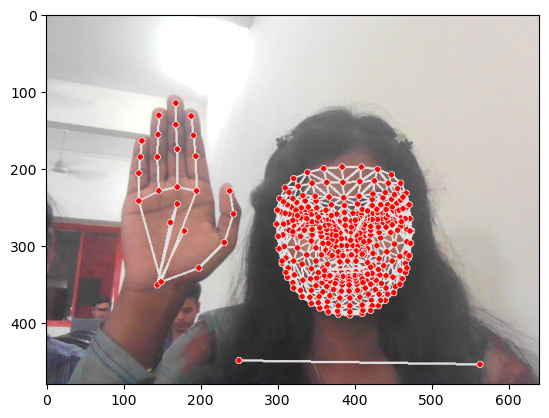

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('path_to_data') 

# Actions that we try to detect
actions = np.array(['book','cat', 'check', 'class', 'cry', 'different', 'door', 'food', 'green', 'hair', 'have', 'headache', 'help', 'inform', 'knife', 'laugh', 'learn', 'movie'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 24

# Folder start
start_folder = 30

In [22]:
signs = ['book','cat', 'check', 'class', 'cry', 'different', 'door', 'food', 'green', 'hair', 'have', 'headache', 'help', 'inform', 'knife', 'laugh', 'learn', 'movie']

parent_folder = 'path_to_data'

if not os.path.exists(parent_folder):
    os.mkdir(parent_folder)
    for sign in signs:
        sign_folder = os.path.join(parent_folder, sign)
        os.mkdir(sign_folder)
        for i in range(30):
            subfolder = os.path.join(sign_folder, str(i))
            os.mkdir(subfolder)


# Collect Keypoint Values for Training and Testing

In [13]:
signs = ['book','cat', 'check', 'class', 'cry', 'different', 'door', 'food', 'green', 'hair', 'have', 'headache', 'help', 'inform', 'knife', 'laugh', 'learn', 'movie', 'read']  # Add your actions (words)
no_sequences = 30  # Number of sequences per action
sequence_length = 30  # Length of each sequence
DATA_PATH = 'path_to_data'  # Path to save the data


# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in signs:
    # Loop through sequences aka videos
        for sequence in range(no_sequences):
        # Load the corresponding video for the action (e.g., hello.mp4, thanks.mp4)
            video_path = os.path.join('path_to_videos', f'{action}.mp4')  # Adjust the path
            cap = cv2.VideoCapture(video_path)

            if not cap.isOpened():
                print(f"Error: Could not open video file {video_path}")
                continue

            # Get total number of frames in the video
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            print(f"Total frames in video {action}: {total_frames}")

            # Loop through video frames aka sequence length
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                if not ret:
                    print(f"End of video for action {action}")
                    break

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Apply wait logic for the first frame
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

            cap.release()
            cv2.destroyAllWindows()




Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video cat: 67
Total frames in video food: 81
Total frames in video food: 81
Total frames in video food: 81
Total f

In [12]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'book': 0,
 'cat': 1,
 'check': 2,
 'class': 3,
 'cry': 4,
 'different': 5,
 'door': 6,
 'food': 7,
 'green': 8,
 'hair': 9,
 'have': 10,
 'headache': 11,
 'help': 12,
 'inform': 13,
 'knife': 14,
 'laugh': 15,
 'learn': 16,
 'movie': 17}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [28]:
X = np.array(sequences)

In [26]:
y = to_categorical(labels).astype(int)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Build and Train LSTM Neural Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
#While training access tensorboard
#tensorboard --logdir=.

In [42]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(30, 1662, 1)))  # Assuming grayscale (1 channel)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the result to feed into Dense layers
model.add(Flatten())

# Add dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Final output layer with softmax
model.add(Dense(actions.shape[0], activation='softmax'))
 

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 1660, 64)      640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 830, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 828, 128)      73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 414, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 412, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 206, 64)       

In [45]:
model.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[tb_callback])




Epoch 1/10
3/3 [==============================] - 24s 5s/step - loss: 1.2294 - accuracy: 0.2118
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 1.0867 - accuracy: 0.4941
Epoch 3/10
3/3 [==============================] - 13s 5s/step - loss: 1.0541 - accuracy: 0.6941
Epoch 4/10
3/3 [==============================] - 21s 7s/step - loss: 0.9905 - accuracy: 0.4824
Epoch 5/10
3/3 [==============================] - 15s 6s/step - loss: 0.7998 - accuracy: 0.6941
Epoch 6/10
3/3 [==============================] - 9s 2s/step - loss: 0.6133 - accuracy: 0.8471
Epoch 7/10
3/3 [==============================] - 16s 5s/step - loss: 0.4058 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 16s 7s/step - loss: 0.3100 - accuracy: 0.8706
Epoch 9/10
3/3 [==============================] - 29s 12s/step - loss: 0.2223 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 37s 11s/step - loss: 0.1061 - accuracy: 1.0000


In [1]:
model.summary()

NameError: name 'model' is not defined

c:\Users\dell\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


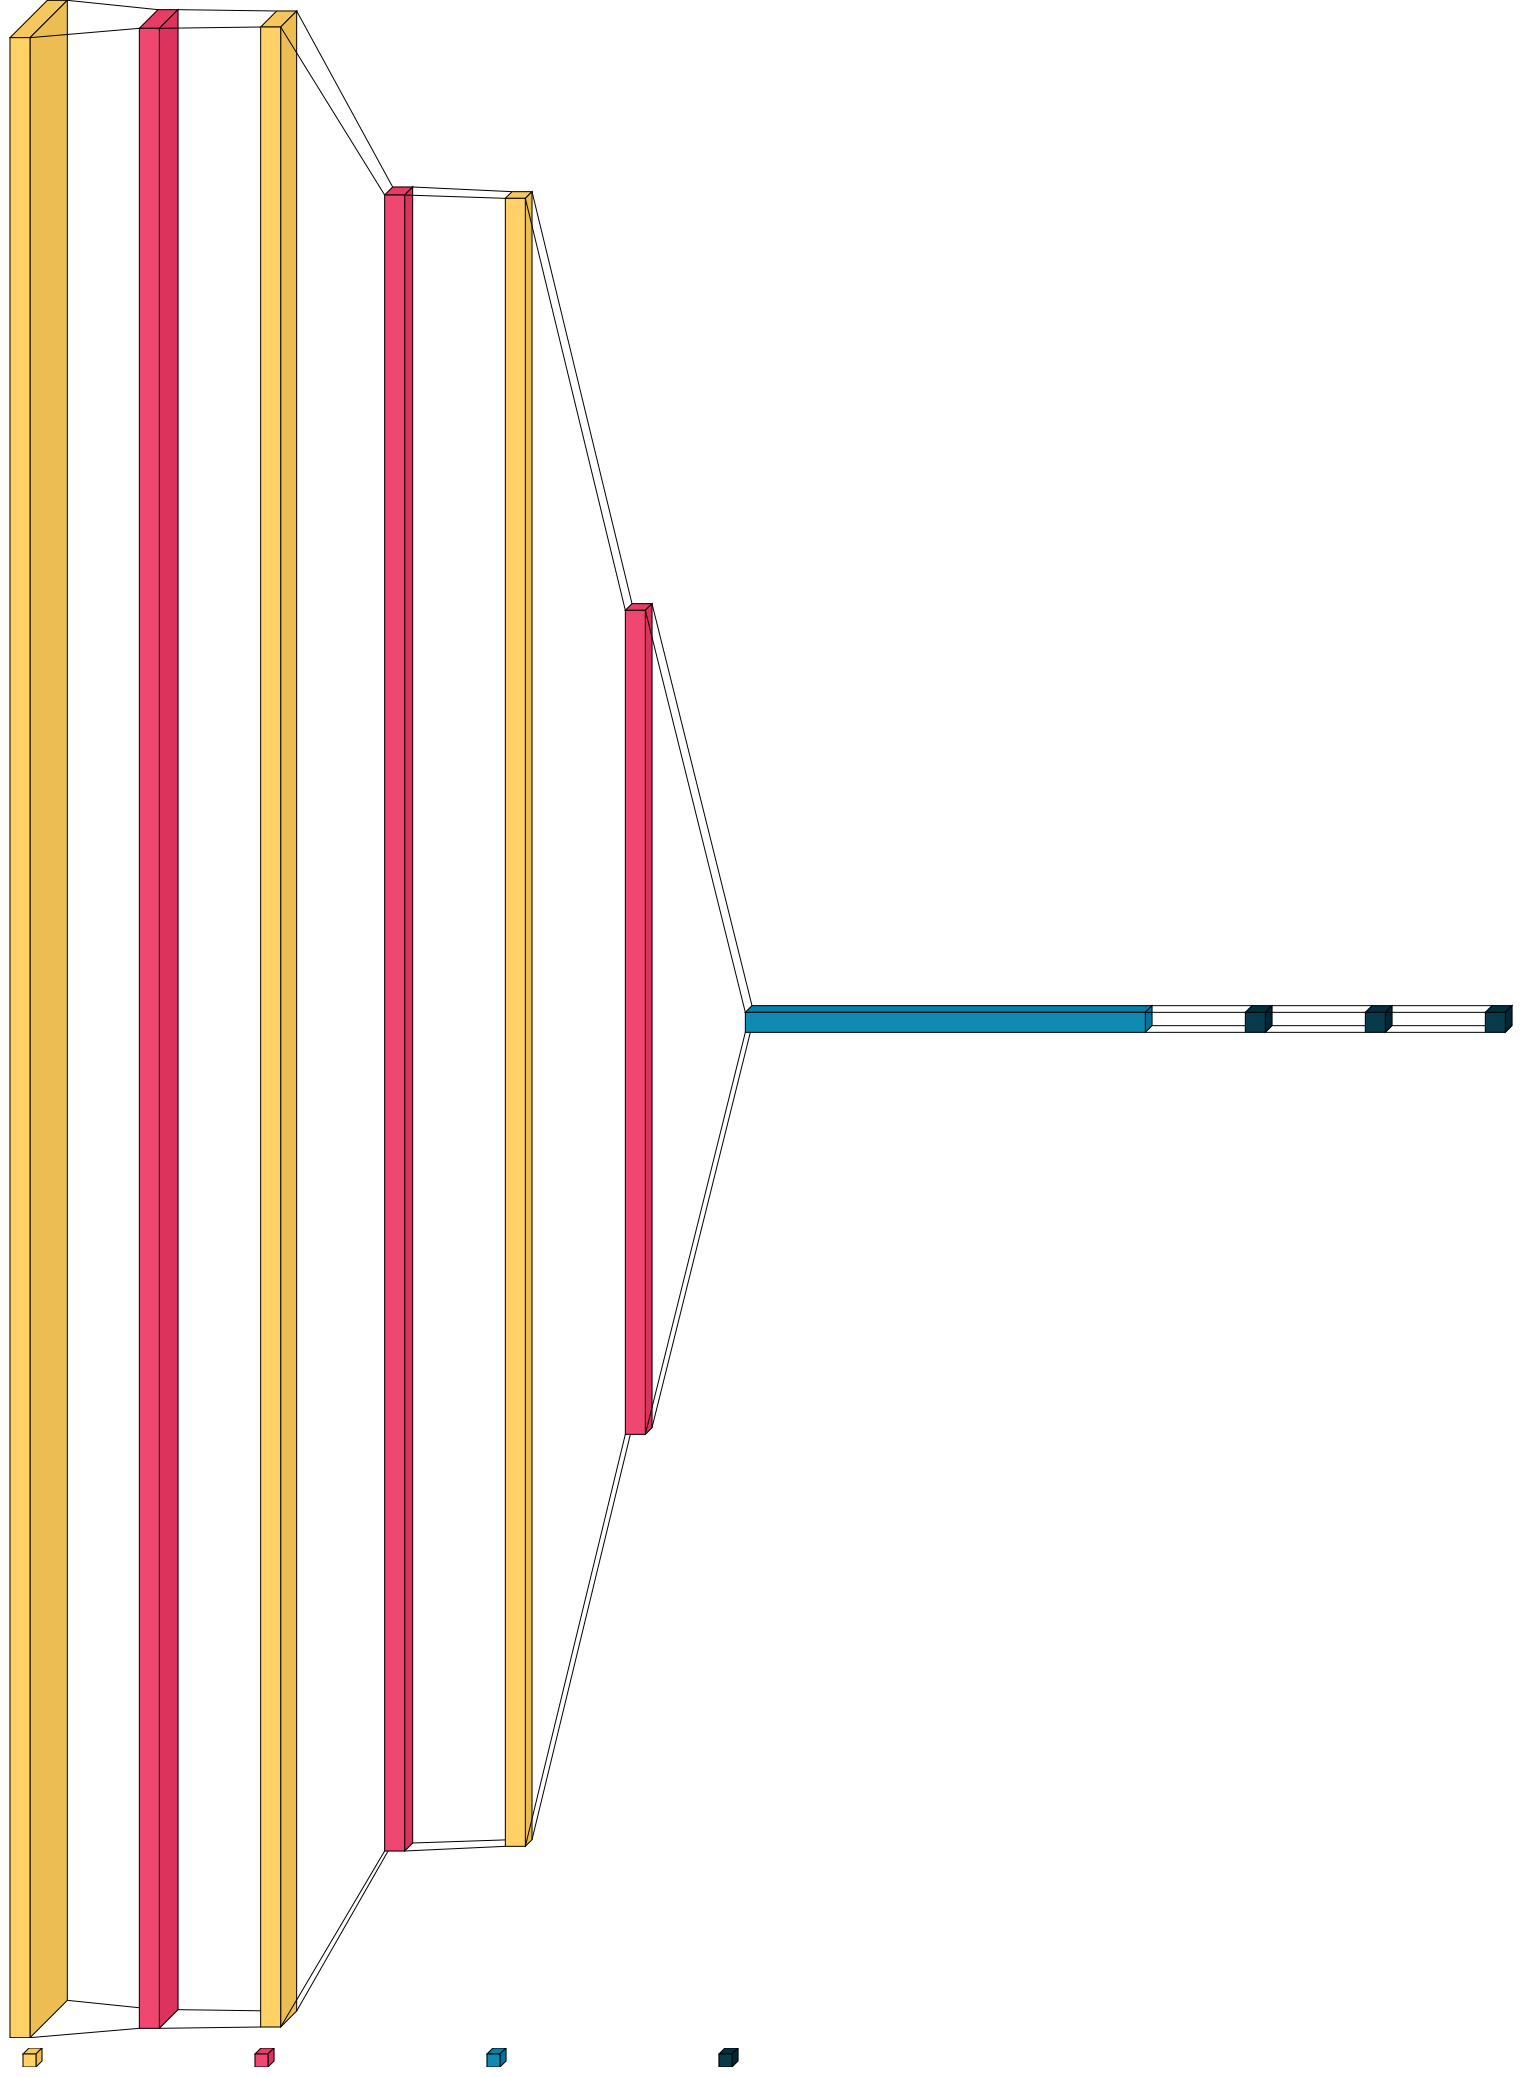

In [46]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font,spacing=100)

# Make Predictions

In [47]:
res = model.predict(X_test)

1/1 [==============================] - 1s 863ms/step


In [48]:
actions[np.argmax(res[4])]

'cat'

In [49]:
actions[np.argmax(y_test[4])]

'cat'

# Save Weights

In [50]:
model.save('./model.h5')
model.save_weights('./model_weights.h5');

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
del model

In [52]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')

In [53]:
model.load_weights('model_weights.h5')

# Evaluation using Confusion Matrix

In [35]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [54]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 269ms/step


In [55]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [56]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 4]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [1]:
accuracy_score(ytrue, yhat)

0.96


# Realtime Test

In [58]:
from scipy import stats

In [59]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [60]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti